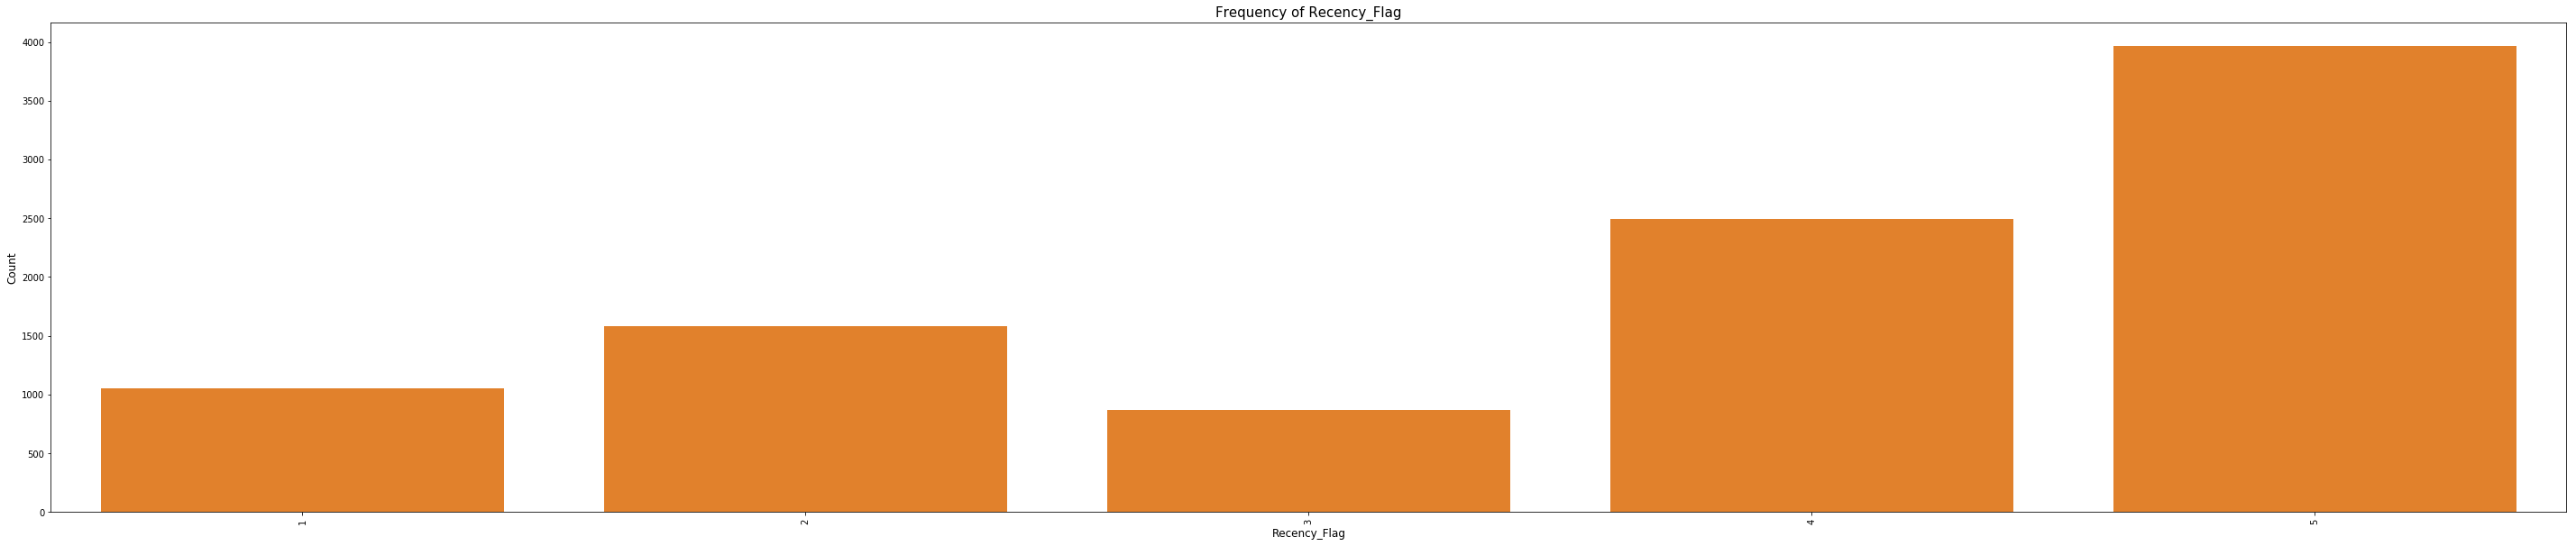

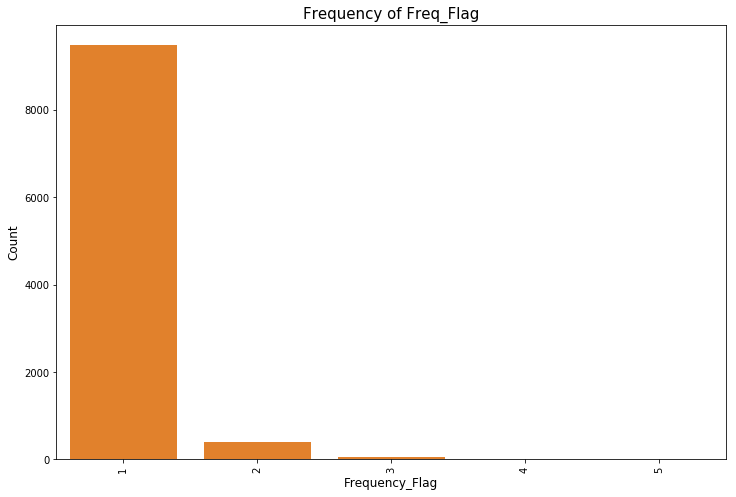

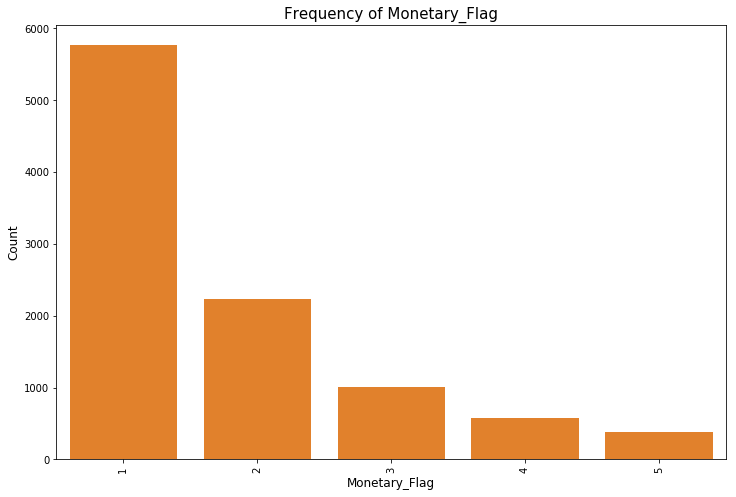

,Customer code,Recency_Flag,Frequency_Flag,Monetary_Flag,Year of birth,City
0,50536,5,1,3,1966,VARESE
1,157183,4,1,2,1976,ROMA
2,167132,2,1,2,not_given,ROMA
3,183882,4,1,1,1965,ROMA
4,187452,2,1,1,not_given,GROTTAFERRATA
5,191450,4,1,4,1960,ROMA
6,194761,5,1,1,not_given,LATINA
7,206530,5,1,3,1983,ROMA
8,206543,5,3,5,not_given,ROMA
9,206576,4,1,3,1954,ROMA


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

basket_table=pd.read_csv("C:\\Users\\MOCCA\\Desktop\\lekakosData\\data\\basket.csv", sep=';')
customer_table=pd.read_csv("C:\\Users\\MOCCA\\Desktop\\lekakosData\\data\\customer.csv", sep=';')
class_table=pd.read_csv("C:\\Users\\MOCCA\\Desktop\\lekakosData\\data\\class.csv", sep=';')
document_table=pd.read_csv("C:\\Users\\MOCCA\\Desktop\\lekakosData\\data\\Document.csv", sep=';')
# basket_table.head(10)
# customer_table.head(10)
# class_table.head(10)
# document_table.head(10)

document_table = document_table.rename(columns={'Document n#': 'Document n.'})
# document_table.head(10)
quantity_of_each_SKU = basket_table.groupby(['Document n.','SKU','Class','Item value']).size().reset_index(name='Quantity')
# quantity_of_each_SKU
document_num_merged_with_class = pd.merge(quantity_of_each_SKU,class_table,how='left',on='Class')
document_num_merged_with_class = document_num_merged_with_class.drop('Class', axis=1)
document_num_merged_with_class
# # document_table = document_table.rename(columns={'Document n.': 'Document n.'})
document_table_unique = document_table.groupby(['Document n.','Customer code','Document date']).size().reset_index(name='Count')
# document_table_unique = document_table_unique.rename(columns={'Document n#': 'Document n.'})
document_table_unique = document_table_unique.drop('Count', axis=1)
# document_table_unique = pd.merge(document_table_unique,document_table,how='left',on='Document n.')
document_table_unique
document_and_class_merged_with_CID = pd.merge(document_num_merged_with_class,document_table_unique,how='left',on='Document n.')
document_and_class_merged_with_CID
document_class_CID_merged_with_City = pd.merge(document_and_class_merged_with_CID,customer_table,how='left',on='Customer code')
document_class_CID_merged_with_City = document_class_CID_merged_with_City.drop(['Post code','Day of birth','Month of birth','Year of birth'], axis=1)
document_class_CID_merged_with_City
# # document_class_CID_City_merged_with_Date = pd.merge(document_class_CID_merged_with_City,document_table,how='left',on='Document n.')
# # document_class_CID_City_merged_with_Date
document_class_CID_merged_with_City['Total_Price']=document_class_CID_merged_with_City['Quantity']*document_class_CID_merged_with_City['Item value']
document_class_CID_merged_with_City
# Cust_City=document_class_CID_merged_with_City[['City','Customer code']].drop_duplicates()
# # Cust_City

# #Calculating the distinct count of customer for each city

Cust_City_count=Cust_City.groupby(['City'])['Customer code'].aggregate('count').reset_index()
Cust_City_count.sort_values(by='Customer code',ascending=False,inplace=True)
Cust_City_count
City=list(Cust_City_count['City'])
Cust_id=list(Cust_City_count['Customer code'])
plt.figure(figsize=(200,100))
sns.barplot(City, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='75')
plt.show()

#RECENCY

Cust_date_ALL=document_class_CID_merged_with_City
Cust_date_ALL=Cust_date_ALL[['Customer code','Document date']].drop_duplicates()

def recentAlgo(row):
    if row['Document date'] >= 20141101:
        val = 5
    elif row['Document date'] < 20141101 and row['Document date'] >= 20140901:
        val = 4
    elif row['Document date'] < 20140901 and row['Document date'] >= 20140701:
        val = 3
    elif row['Document date'] < 20140701 and row['Document date'] >= 20140501:
        val = 2
    else:
        val = 1
    return val

Cust_date_ALL['Recency_Flag']=Cust_date_ALL.apply(recentAlgo, axis=1)
Cust_date_ALL = Cust_date_ALL.groupby("Customer code",as_index=False)["Recency_Flag"].max()

plt.figure(figsize=(50,10))
sns.countplot(x="Recency_Flag", data=Cust_date_ALL, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Recency_Flag", fontsize=15)
plt.show()

#FREQUENCY

Cust_freq_ALL=document_class_CID_merged_with_City[['City','Document n.','Customer code']].drop_duplicates()

#Calculating the count of unique purchase for each customer

Cust_freq_count_ALL=Cust_freq_ALL.groupby(["City","Customer code"])["Document n."].aggregate("count").reset_index()
Cust_freq_count_ALL.sort_values(by='Document n.', ascending=False, inplace=True)
# Cust_freq_count_ROMA=Cust_freq_count[Cust_freq_count['City']=="ROMA"]
unique_documentNo=Cust_freq_count_ALL[['Document n.']].drop_duplicates()

# Dividing in 5 equal parts
#The “qcut” function will divide the entire range of unique invoice count in 5 equal parts

unique_documentNo['Frequency_Band'] = pd.qcut(unique_documentNo['Document n.'], 5)
unique_documentNo=unique_documentNo[['Frequency_Band']].drop_duplicates()
unique_documentNo

#Values equals visits of customer
def frequencyAlgo(row):
    if row['Document n.'] <= 7.2:
        val = 1
    elif row['Document n.'] > 7.2 and row['Document n.'] <= 13.4:
        val = 2
    elif row['Document n.'] > 13.4 and row['Document n.'] <= 19.6:
        val = 3
    elif row['Document n.'] > 19.6 and row['Document n.'] <= 32.2:
        val = 4
    else:
        val = 5
    return val

Cust_freq_count_ALL['Frequency_Flag'] = Cust_freq_count_ALL.apply(frequencyAlgo, axis=1)
plt.figure(figsize=(12,8))
sns.countplot(x="Frequency_Flag", data=Cust_freq_count_ALL, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Frequency_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Freq_Flag', fontsize=15)
plt.show()

#MONETARY

#Calculating the Sum of total monetary purchase for each customer
Cust_monetary_ALL = document_class_CID_merged_with_City.groupby(["City","Customer code"])["Total_Price"].aggregate("sum").reset_index()
Cust_monetary_ALL.sort_values(by='Total_Price', ascending=False, inplace=True)
# Cust_monetary_ROMA=Cust_monetary[Cust_monetary['City']=="ROMA"]
# Cust_monetary_ROMA

# Notice that there are some negative values in the total price column.
# This is the case because when a customer returns the product it purchased,
# it is stored as a negative value in the quantity column.
# Before splitting Total price in 5 parts, we will remove these negative quantities.

unique_price=Cust_monetary_ALL[['Total_Price']].drop_duplicates()
unique_price=unique_price[unique_price['Total_Price'] > 0]
unique_price['Monetary_Band'] = pd.qcut(unique_price['Total_Price'], 5)
unique_price=unique_price[['Monetary_Band']].drop_duplicates()
unique_price

#Tagging customers in the range of 1 to 5 based on their Total price value,
#where 5 corresponds the customers having highest monetary value:

def monetaryAlgo(row):
    if row['Total_Price'] <= 352.6:
        val = 1
    elif row['Total_Price'] > 352.6 and row['Total_Price'] <= 701.2:
        val = 2
    elif row['Total_Price'] > 701.2 and row['Total_Price'] <= 1085.8:
        val = 3
    elif row['Total_Price'] > 1085.8 and row['Total_Price'] <= 1667.2:
        val = 4
    else:
        val = 5
    return val

Cust_monetary_ALL['Monetary_Flag'] = Cust_monetary_ALL.apply(monetaryAlgo, axis=1)

#Let us check the distribution of Monetary flags:

plt.figure(figsize=(12,8))
sns.countplot(x="Monetary_Flag", data=Cust_monetary_ALL, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetary_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Monetary_Flag", fontsize=15)
plt.show()

#Combining all the three flags

Cust_City_All=pd.merge(Cust_date_ALL,Cust_freq_count_ALL[['Customer code',"Frequency_Flag"]],on=['Customer code'],how='left')
Cust_City_All=pd.merge(Cust_City_All,Cust_monetary_ALL[['Customer code','Monetary_Flag']],on=['Customer code'],how='left')
Cust_City_All=pd.merge(Cust_City_All,customer_table,on=['Customer code'],how='left')
Cust_City_All = Cust_City_All.drop(['Day of birth','Month of birth','Post code'], axis=1)
Cust_City_All.fillna(value='not_given', inplace=True)
Cust_City_All

# def ageCalculation(row):
#     if row['Year of birth'] 
